1. Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


2. Load Dataset

In [6]:
df = pd.read_csv('training.1600000.processed.noemoticon.csv', 
                 encoding='latin-1', 
                 header=None, 
                 names=["target", "ids", "date", "flag", "user", "text"])
df = df[['target', 'text']]

# Ubah label 4 → 1 agar hasilnya 0 (negatif) dan 1 (positif)
df['target'] = df['target'].replace(4, 1)

In [7]:
df

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,1,Just woke up. Having no school is the best fee...
1599996,1,TheWDB.com - Very cool to hear old Walt interv...
1599997,1,Are you ready for your MoJo Makeover? Ask me f...
1599998,1,Happy 38th Birthday to my boo of alll time!!! ...


3. Preprocessing Teks

In [9]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)           # hapus URL
    text = re.sub(r"@\w+", "", text)              # hapus mention
    text = re.sub(r"[^a-zA-Z\s]", "", text)       # hapus angka dan simbol
    tokens = text.split()
    tokens = [w for w in tokens if w not in stop_words]
    return " ".join(tokens)

df['clean_text'] = df['text'].apply(clean_text)

4. Split data

In [10]:
X = df['clean_text']
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

5. TF-IDF Vectorization

In [11]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

6. Training Model

In [12]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

              precision    recall  f1-score   support

           0       0.75      0.77      0.76    159494
           1       0.76      0.75      0.76    160506

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000



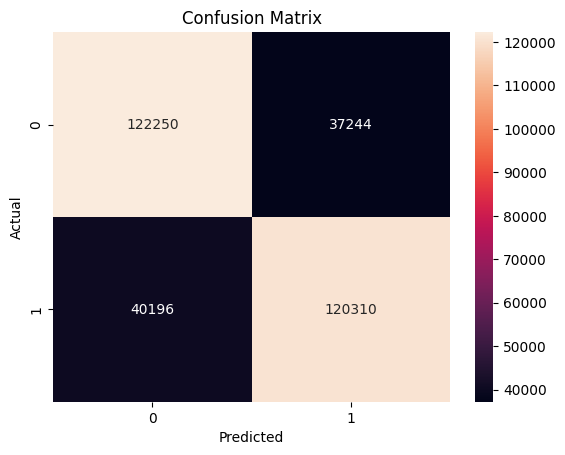

In [13]:
y_pred = model.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
def predict_sentiment(text):
    cleaned = clean_text(text)
    vector = vectorizer.transform([cleaned])
    pred = model.predict(vector)
    return "Positive" if pred[0] == 1 else "Negative"

In [19]:
print(predict_sentiment("This product is great!"))

Positif
